# RNN을 이용한 SMS Spam 분류
- 캐글에서 제공하는 스팸메일 데이터

### 한글 폰트 사용

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
# 설치 뒤 font-manager rebuild
import matplotlib.font_manager as fm
fm._rebuild()

### 런타임에서 다시 시작

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumGothic')

### 파일 업로드

In [6]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving spam.csv to spam.csv


In [7]:
df = pd.read_csv(filename, encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
df['v1'] = df['v1'].replace(['ham', 'spam'], [0, 1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
df['v2'].nunique()

5169

In [11]:
df = df.drop_duplicates('v2', keep='first')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


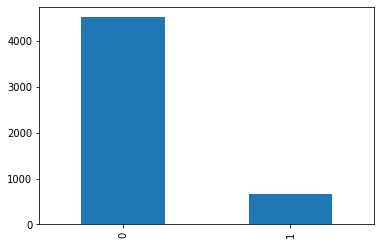

In [12]:
df['v1'].value_counts().plot(kind='bar');

In [13]:
df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [14]:
X_data = df['v2'].values
y_data = df['v1'].values
print('SMS 본문의 개수: ', len(X_data))
print('레이블의 개수: ', len(y_data))

SMS 본문의 개수:  5169
레이블의 개수:  5169


In [15]:
t = Tokenizer()
t.fit_on_texts(X_data)
sequences = t.texts_to_sequences(X_data)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기: %d' % vocab_size)

단어 집합의 크기: 8921


In [16]:
X_data = sequences

### 전체 데이터셋의 길이를 100에 맞춤

In [17]:
data = pad_sequences(X_data, maxlen=100)
data.shape

(5169, 100)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y_data, stratify=y_data, test_size=0.2, random_state=seed)

In [19]:
X_train.shape, X_test.shape

((4135, 100), (1034, 100))

### 모델 정의/설정/학습

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

In [21]:
model = Sequential([
                    Embedding(vocab_size, 32),
                    SimpleRNN(32),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          285472    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 287,585
Trainable params: 287,585
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 7s 80ms/step - loss: 0.4403 - accuracy: 0.8517 - val_loss: 0.2390 - val_accuracy: 0.9033
Epoch 2/10
56/56 [==============================] - 4s 68ms/step - loss: 0.1242 - accuracy: 0.9710 - val_loss: 0.0745 - val_accuracy: 0.9831
Epoch 3/10
56/56 [==============================] - 4s 71ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.0533 - val_accuracy: 0.9891
Epoch 4/10
56/56 [==============================] - 4s 70ms/step - loss: 0.0691 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 5/10
56/56 [==============================] - 4s 70ms/step - loss: 0.0240 - accuracy: 0.9950 - val_loss: 0.0602 - val_accuracy: 0.9843
Epoch 6/10
56/56 [==============================] - 4s 69ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0581 - val_accuracy: 0.9867
Epoch 7/10
56/56 [==============================] - 4s 69ms/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0968 - val_accuracy: 0.9686
Epoch 8/10
56

In [24]:
acc = model.evaluate(X_test, y_test, verbose=2)[1]
print(f'Accuracy: {acc:.4f}')

33/33 - 0s - loss: 0.0818 - accuracy: 0.9778
Accuracy: 0.9778
